# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


### Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


#### Import Libraries and Define Auxiliary Functions


In [5]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [6]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the CSV file using requests
response = requests.get(URL)
response.raise_for_status()  # Check for errors

# Read CSV content into DataFrame
df = pd.read_csv(io.StringIO(response.text))
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

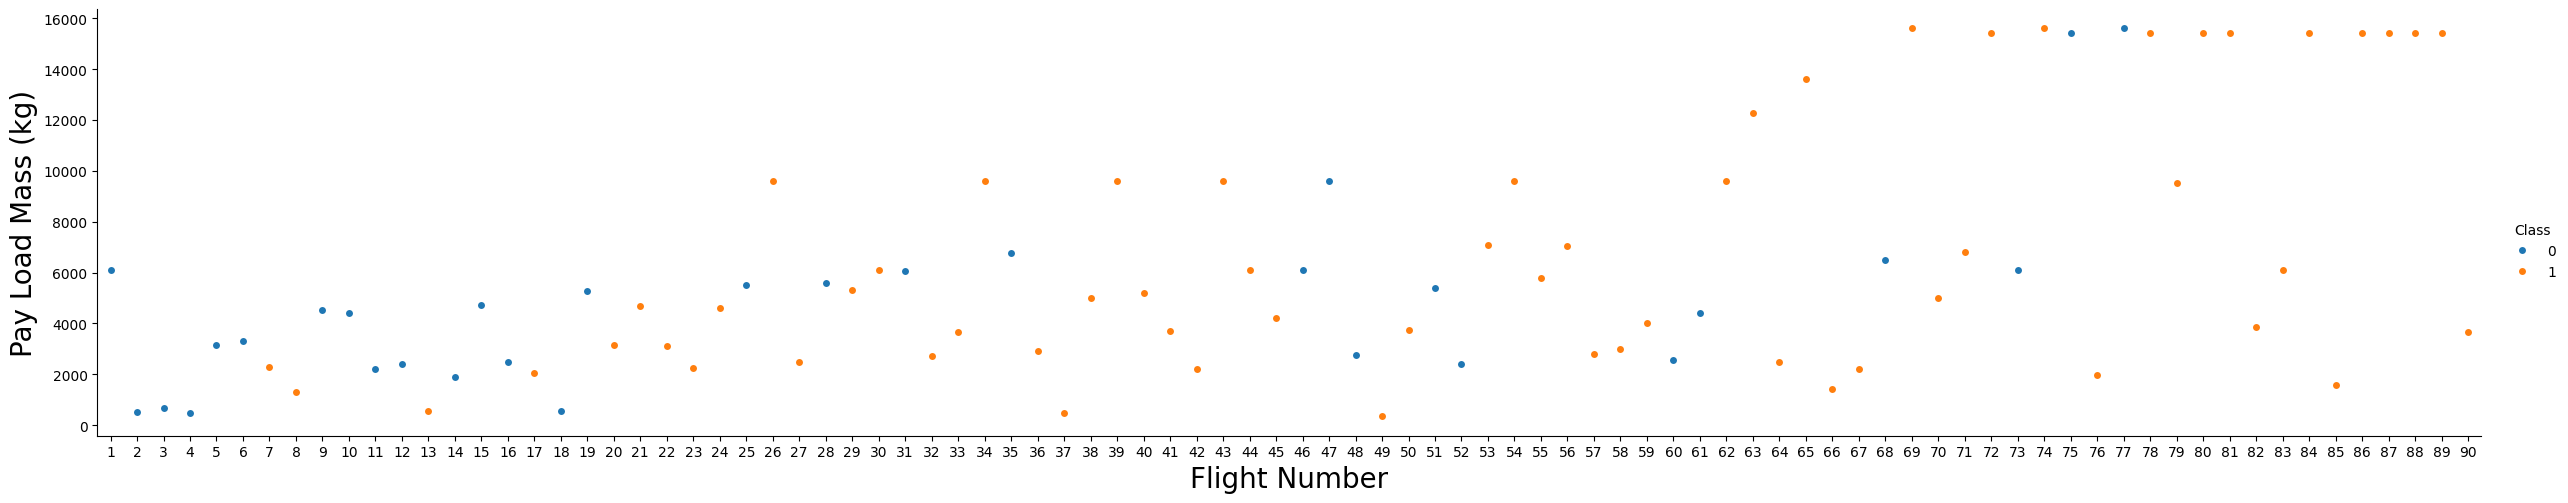

In [10]:
sns.catplot(y="PayloadMass", 
                x="FlightNumber",
                hue="Class", data=df, aspect = 5);
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay Load Mass (kg)", fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


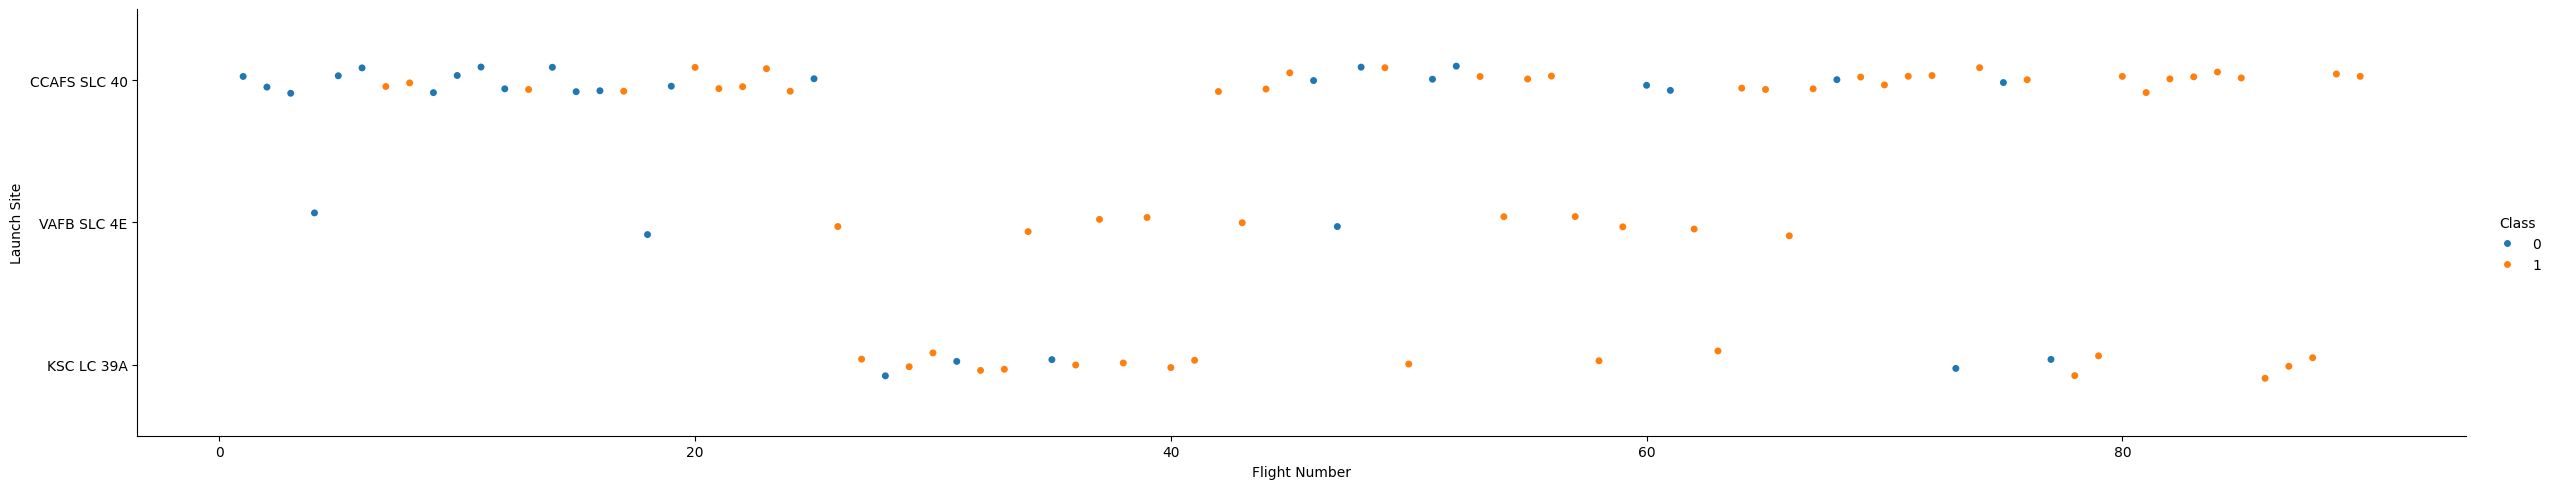

In [11]:
sns.catplot(x="FlightNumber",
            y="LaunchSite",
            hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

#### Insights and Patterns: Flight Number vs. Launch Site

- Certain launch sites show a **high concentration of flight numbers**, indicating frequent usage and operational reliability.
- **Class distribution varies by site**: some launch sites predominantly host successful missions, while others show a mix of outcomes, suggesting experimental or less optimized operations.
- **Sequential flight numbers** at specific sites hint at temporal trends—older sites hosting early missions, newer sites handling recent launches.
- **Sparse or isolated points** may represent special missions, anomalies, or temporary site inactivity.
- Sites with **diverse class outcomes** could be testing grounds or shared facilities for multiple mission types.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


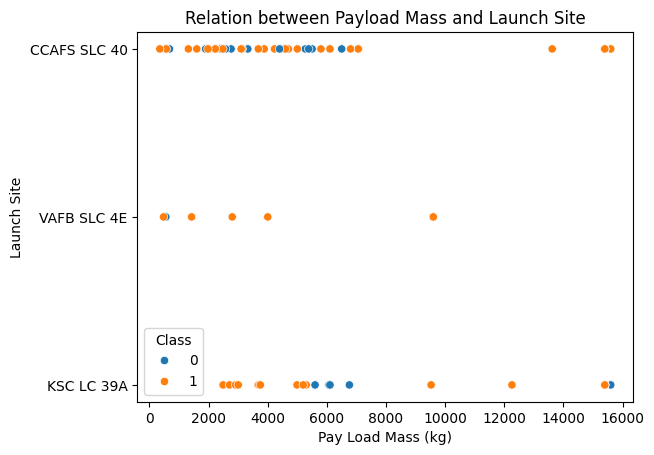

In [19]:
sns.scatterplot(x="PayloadMass",
                y="LaunchSite",
                data=df, hue="Class");
plt.xlabel("Pay Load Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Relation between Payload Mass and Launch Site")
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Let's create a `bar chart` for the sucess rate of each orbit


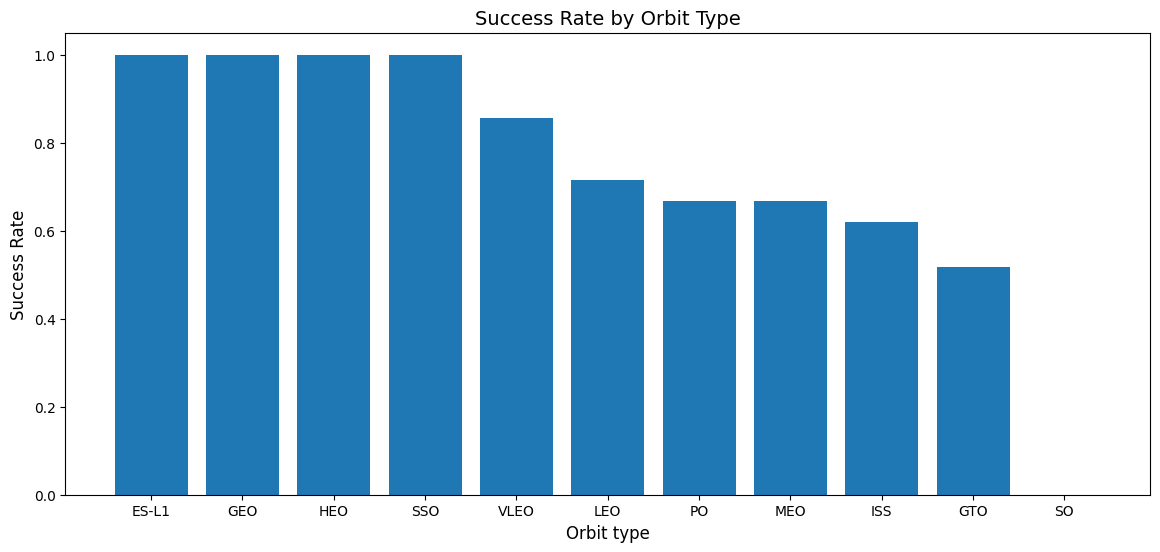

In [16]:
# Group by Orbit and calculate the mean of Class (success rate)
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Sort values for better visualization
orbit_success = orbit_success.sort_values(by="Class", ascending=False)

plt.figure(figsize=(14,6))

# Plot the Bar Chart
plt.bar(orbit_success["Orbit"],
            orbit_success["Class"]);
plt.title("Success Rate by Orbit Type", fontsize=14)
plt.xlabel("Orbit type", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.show()

#### Insights and Patterns: Success Rate by Orbit Type

- **ES-L1, GEO, HEO, and SSO** exhibit the **highest success rates**, indicating strong reliability and mature mission infrastructure for these orbit types.
- **VLEO and LEO** show slightly lower success rates, possibly due to higher launch frequency or more experimental missions.
- **PO, MEO, and ISS** have moderate success rates, suggesting mixed mission outcomes or operational challenges.
- **GTO and SO** stand out with the **lowest success rates**, which may reflect technical complexity, higher risk profiles, or limited mission experience.
- Overall, the chart highlights a clear **performance gradient** across orbit types, useful for strategic planning and risk assessment in future missions.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


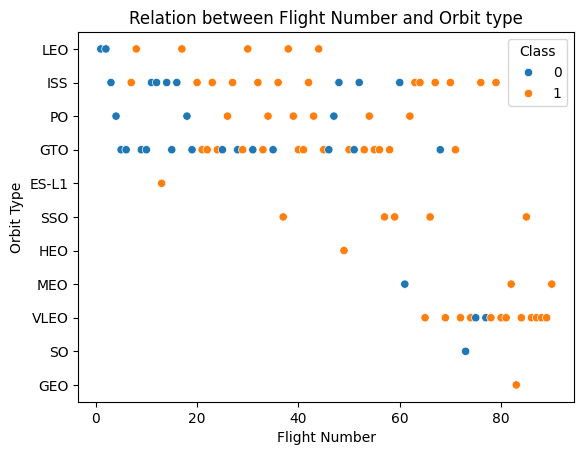

In [18]:
sns.scatterplot(x="FlightNumber",
                y="Orbit",
                data=df, hue="Class")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.title("Relation between Flight Number and Orbit type")
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


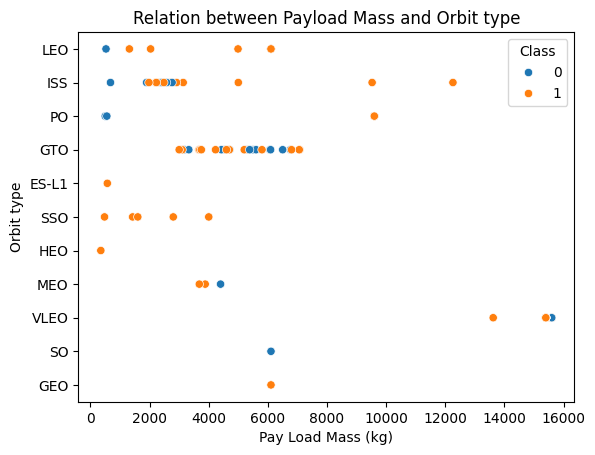

In [20]:
sns.scatterplot(x="PayloadMass",
                y="Orbit",
                data=df, hue="Class")
plt.xlabel("Pay Load Mass (kg)")
plt.ylabel("Orbit type")
plt.title("Relation between Payload Mass and Orbit type")
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

### TASK  6: Visualize the launch success yearly trend


Now, We plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()

df["Date"] = year

# Display the Initial few rows
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Compute success rate per year
year_success = df.groupby("Date")["Class"].mean().reset_index()

# Convert 'Date' to integer for proper x-axis sorting
year_success["Date"] = year_success["Date"].astype(int)
year_success = year_success.sort_values("Date")

Plot a line chart with x axis to be the extracted year and y axis to be the success rate

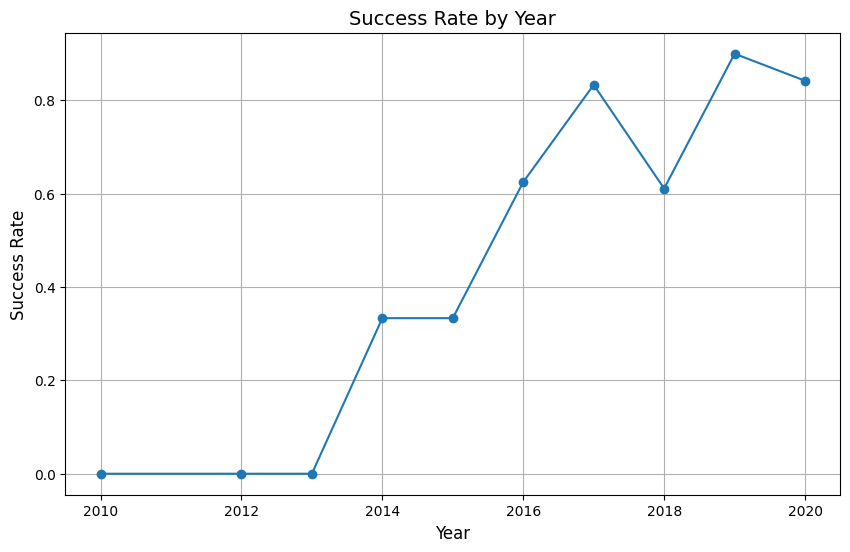

In [30]:
plt.figure(figsize=(10,6))
plt.plot(year_success["Date"], year_success["Class"], marker='o');
plt.title("Success Rate by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


We will select the features that will be used in success prediction in the future module.


In [33]:
features = df[["FlightNumber", "PayloadMass", "Orbit", "LaunchSite",
               "Flights", "GridFins", "Reused", "Legs",
               "LandingPad", "Block", "ReusedCount", "Serial"]]

# Display Initial few rows
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [32]:
# Apply OneHotEncoder using get_dummies on specified categorical columns
features_one_hot = pd.get_dummies(features,
                                  columns=["Orbit", "LaunchSite",
                                           "LandingPad", "Serial"])

#Display Initial few rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [34]:
# Cast the Entire DataFrame to Float64
features_one_hot = features_one_hot.astype("float64")

# Display the first few rows to confirm
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [35]:
features_one_hot.to_csv("dataset_part_3.csv", index=False)

----